In [74]:
# 사용할 데이터셋 다운로드 하기
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정하기 - /기본 경로/datasets/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 URL

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # URL로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축 파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기

fetch_housing_data()

C:\Users\user\AppData\Local\Temp\ipykernel_604\775006200.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path= housing_path) # 압축 파일(housing.tgz) 압축 풀기


In [75]:
# 다운 받은 데이터셋(csv) 파일을 pandas 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename="housing.csv"):
  csv_path = os.path.join(housing_path, filename) # os.path.join("/datasets/housing", "housing.csv") -> /datasets/housing/housing.csv
  return pd.read_csv(csv_path) # 데이터 프레임 리턴

# 데이터 세트 확인

In [76]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 데이터 기본 정보 확인

In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
# 결측치 정보확인
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [79]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


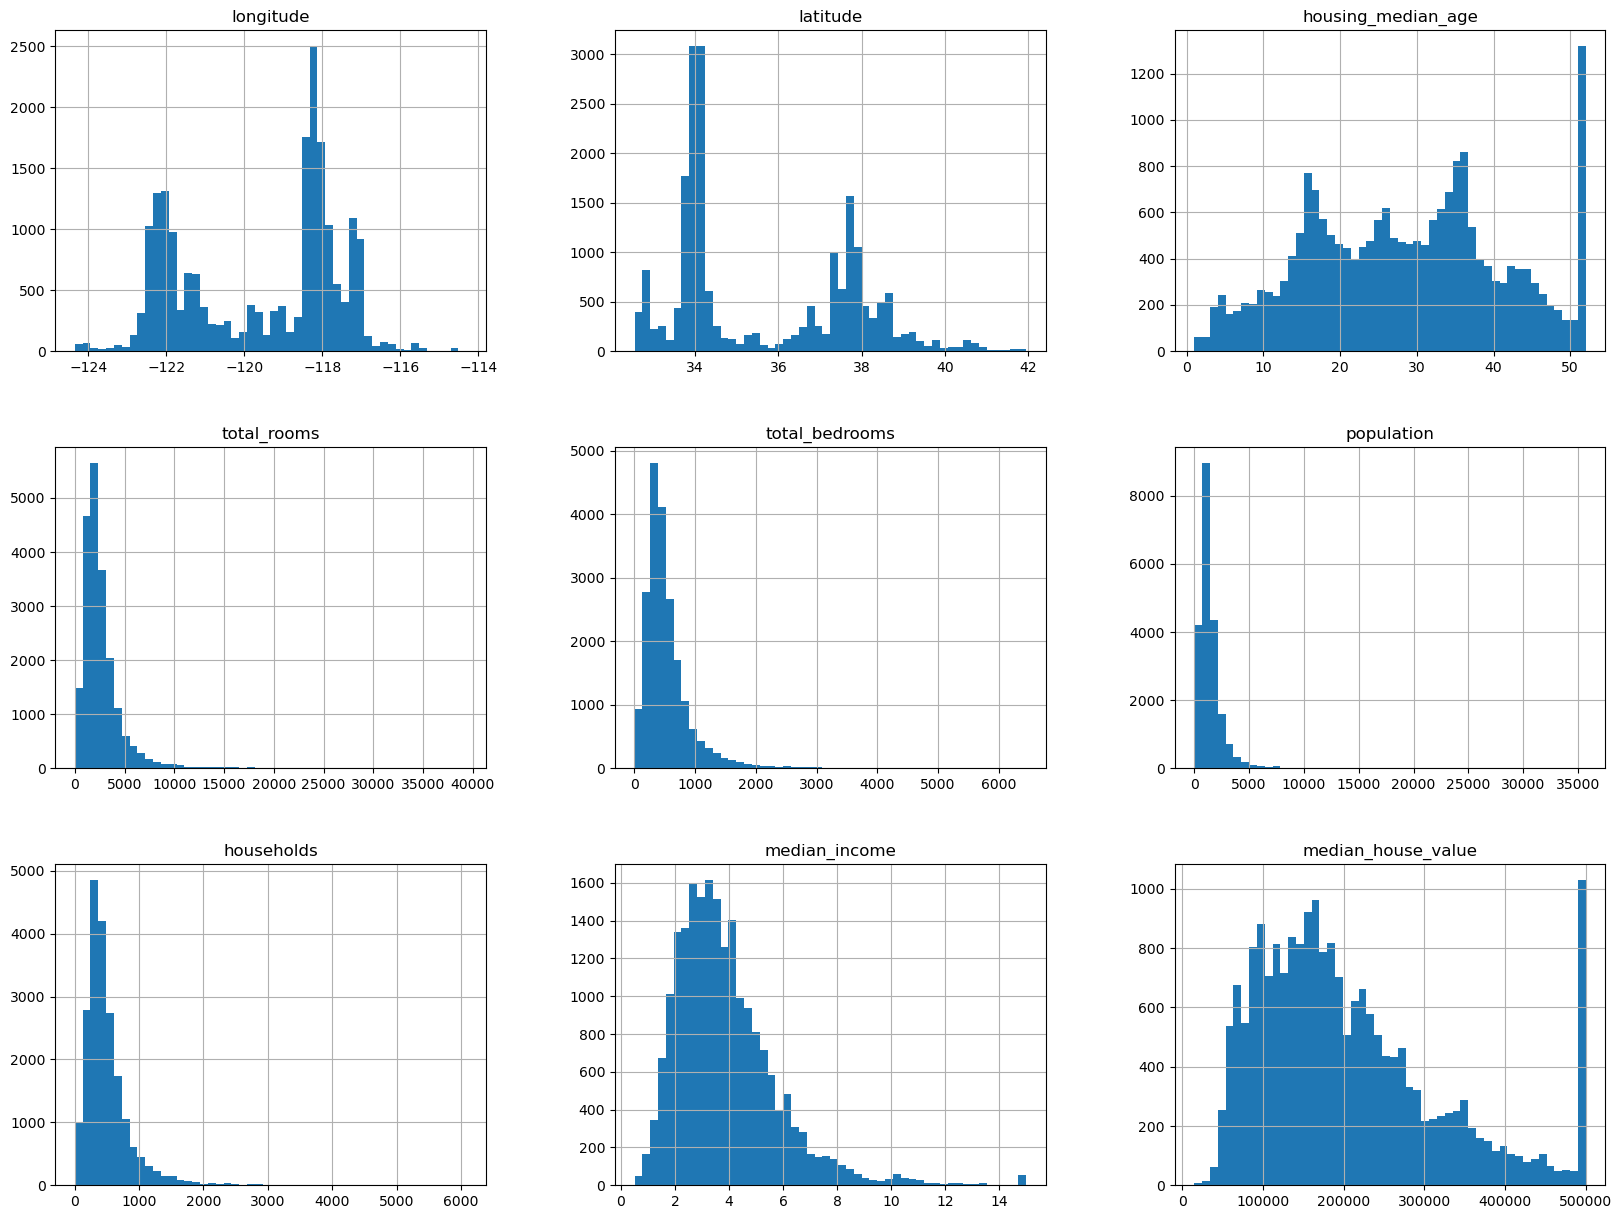

In [80]:
import matplotlib.pyplot as plt

housing.hist(
    bins = 50, 
    figsize = (20, 15)
)

plt.show()

## 훈련 / 테스트 세트 분할
- 중간 수입 데이터(median income)이 집 가격(median_house_value)에 영향을 많이 미칠 것으로 예상
    - 상관 관계가 충분히 강하다 하고 생각할수 있다.
- 훈련 / 테스트 세트 분할 수행 시 median_income의 계층에 맞춰서 분할이 되어야 **공평**
    - MEDIAN_INCOME은 실수 형식의 데이터이기 때문에 계층이 존재하지 않는다. 따라서 실수 데이터를 분할해서 계층을 생성

In [81]:
from sklearn.model_selection import train_test_split

# 랜덤하게 데이터를 잘라낸 경우
train_set, test_set = train_test_split(
    housing,
    test_size = 0.2,
    random_state= 42
)

<Axes: >

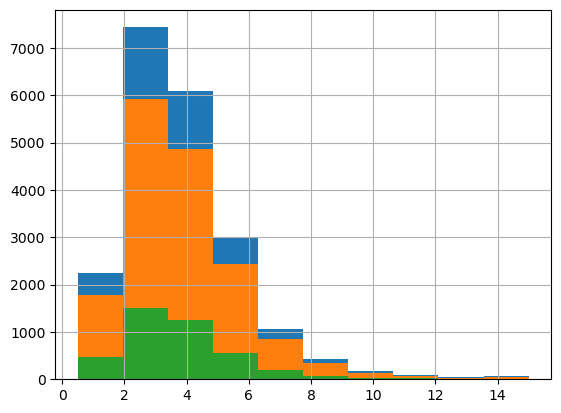

In [82]:
housing['median_income'].hist()
train_set['median_income'].hist()
test_set['median_income'].hist()

In [83]:
# 구간 분할을 통한 계층적 분할
import numpy as np

# income-cat : 소득구간
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels = [1,2,3,4,5]
)

housing[['median_income', 'income_cat']].head()

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3


<Axes: >

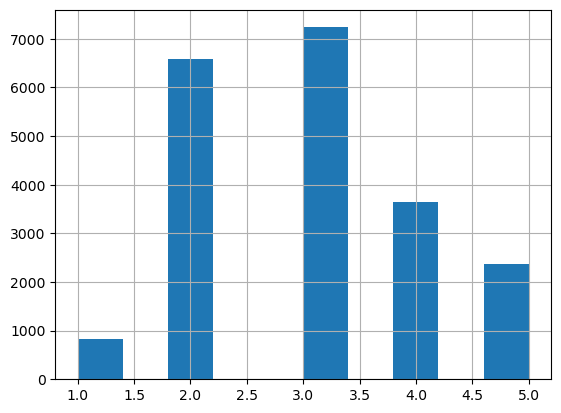

In [84]:
housing['income_cat'].hist()

In [85]:
# 구간에 대한 계층적 분할 수행
train_set, test_set = train_test_split(
    housing,
    test_size = 0.2,
    random_state=42,
    stratify=housing['income_cat']
)

In [86]:
# 랜덤하게 잘랐을 때와, 계층 분할을 이용 했을 때의 차이
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 1. 랜덤 분할
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
)

# 2. 계층 분할
train_set_strat, test_set_strat = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing['income_cat']
)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(test_set_strat),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()

compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [87]:
housing = housing.drop('income_cat', axis = 1)
train_set = train_set_strat.drop('income_cat', axis = 1)
test_set = test_set_strat.drop('income_cat', axis = 1)

In [88]:
housing = train_set.copy()

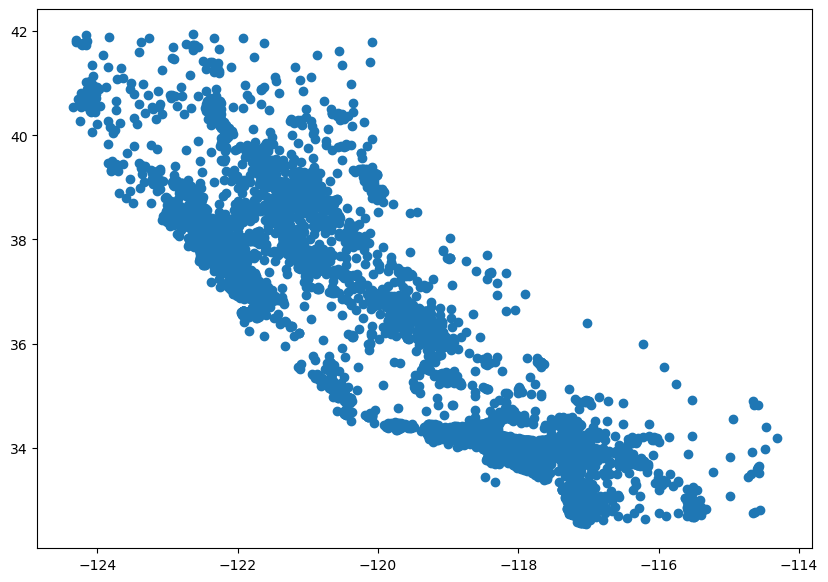

In [89]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x = housing['longitude'],
    y = housing['latitude']
)

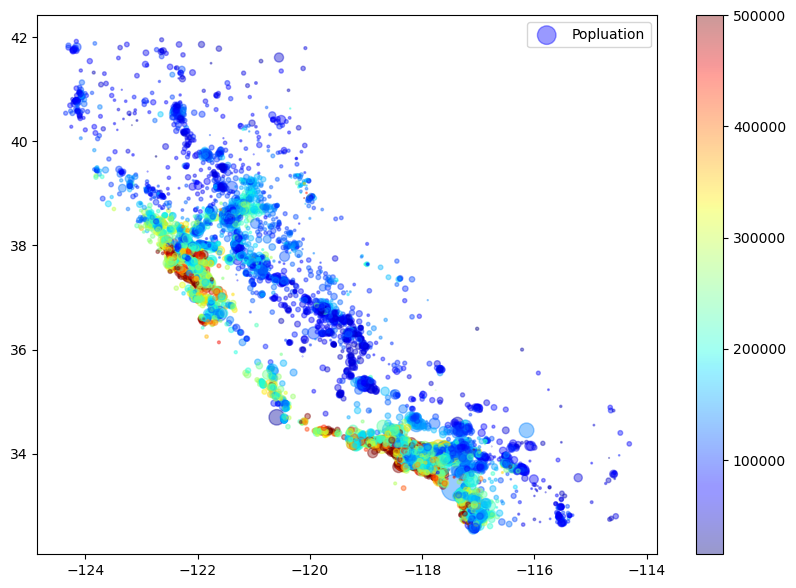

In [90]:
# 불투명도를 이용해서 집의 밀집도를 시각적으로 확인
plt.figure(figsize=(10, 7))

# 1. 점의 크기 : 인구수
# 2. 색 : 집값 확인

# 위경도 정보를 활용해
plt.scatter(
    x = housing['longitude'],
    y = housing['latitude'],
    alpha=0.4,
    
    s=housing['population']/100,
    label = 'Popluation',

    c = housing['median_house_value'],
    cmap = plt.get_cmap('jet')
)
plt.colorbar()
plt.legend()
plt.show()

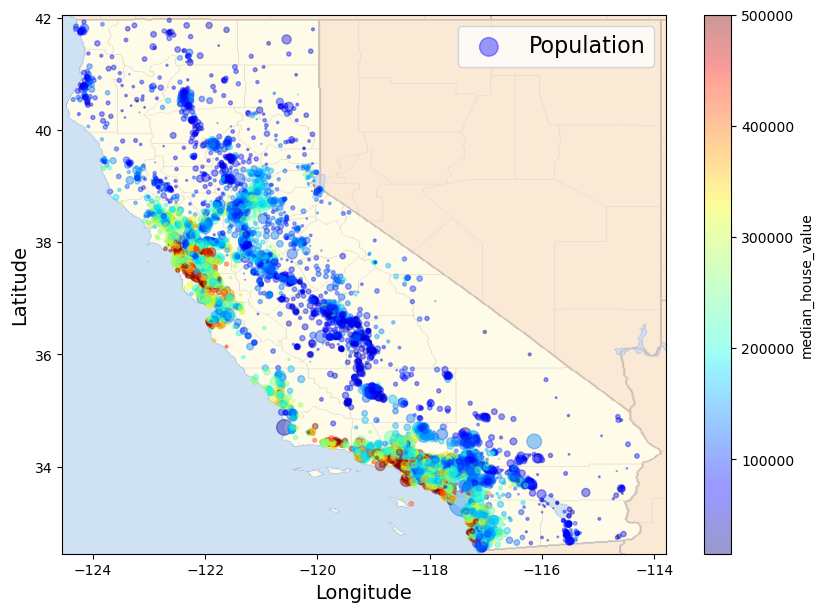

In [91]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,

                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

# EDA

## 상관관계 조사

In [92]:
corr_matrix = housing.drop('ocean_proximity', axis = 1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

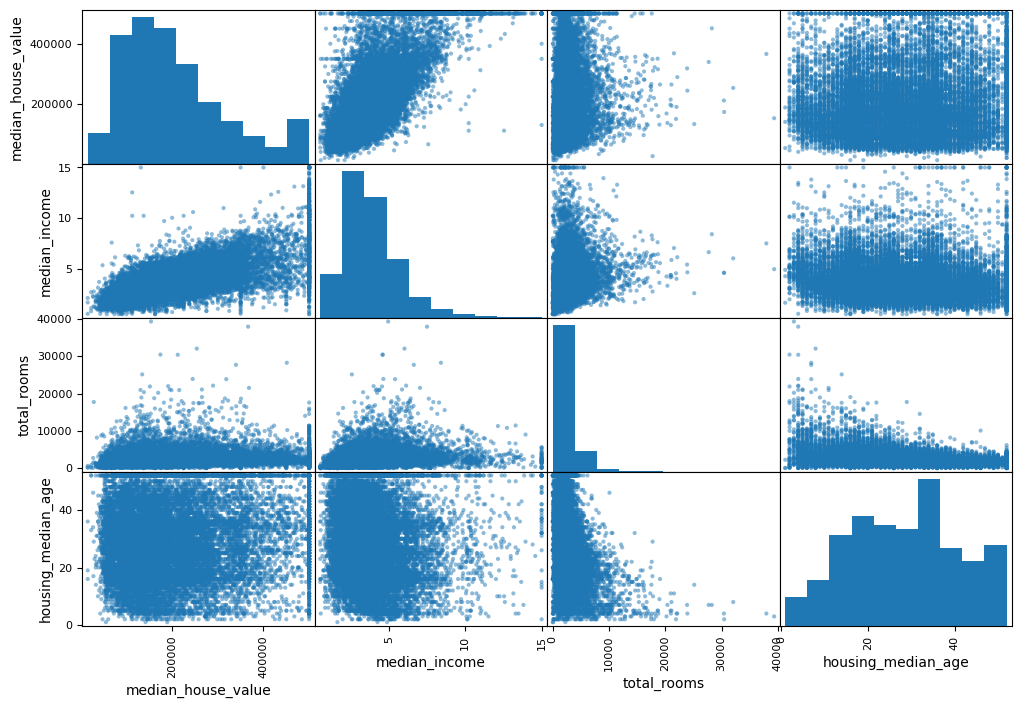

In [93]:
# 선택된 feature의 scatter를 시각화
from pandas.plotting import scatter_matrix

feature_names = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[feature_names], figsize = (12, 8))
plt.show()

## 특성 조합
- 두 개 이상의 특성을 조합해서 새로운 특성 생성
- 비율 구하기
- 관계 설정(곱셈)
- 다항식 등등..

In [94]:
# 가구 당 방의 비율
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

# 침실과 방의 비율
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

# 인구수와 가구의 비율
housing['population_per_household'] = housing['population'] / housing['households']

housing['bedrooms_per_popluation'] = housing['total_bedrooms'] / housing['population']

In [95]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,bedrooms_per_popluation
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555,0.356281
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698,0.424318
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333,0.464768
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213,0.577951
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241,0.351660


In [96]:
corr_matrix = housing.drop('ocean_proximity', axis = 1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
bedrooms_per_popluation     0.065432
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 머신러닝을 위한 데이터 준비
- 데이터에 대한 각종 전처리를 수행하는 파이프라인 생성

In [97]:
# Feature, Label 분리
label_name = "median_house_value"

# label만 따로 빼기
housing_label = housing[label_name]

# Feature만 따로 빼기
housing = housing.drop(label_name, axis=1)

## 1. NaN값 처리
- 데이터 샘플을 제거(행 삭제)
- 아예 컬럼을 제거
    - 한 컬럼에 NaN값이 너무나 많은 경우
- 특정 값으로 채우기
    - 0, 평균, 중간값 등등..
    - 데이터가 충분하다면 NaN값을 예측하기 위한 모델을 만들어서 예측값으로 채우는 경우도 있다.
- 판다스의 fillna, dropna를 하면 파이프라인으로 사용이 불가능함

In [98]:
# pandas의 fillna, dropna는 사이킷런의 파이프라인으로 사용이 불가능!
#   대신, 사이킷런에서 결측치를 처리하기 위해 제공하는 클래스 존재(Tranfomer)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # 누락값을 중간값을 채우기

In [99]:
# median 전략은 숫자 형식의 데이터에만 사용할 수 있기 때문에
#  문자열 형식의 데이터인 ocean_proximity는 제외

housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16354 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  bedrooms_per_popluation   16354 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [100]:
# X에는 누락값이 각 컬럼의 중앙값으로 채워진 배열
X = imputer.fit_transform(housing_num)
X[:3]

array([[-1.21460000e+02,  3.85200000e+01,  2.90000000e+01,
         3.87300000e+03,  7.97000000e+02,  2.23700000e+03,
         7.06000000e+02,  2.17360000e+00,  5.48583569e+00,
         2.05783630e-01,  3.16855524e+00,  3.56280733e-01],
       [-1.17230000e+02,  3.30900000e+01,  7.00000000e+00,
         5.32000000e+03,  8.55000000e+02,  2.01500000e+03,
         7.68000000e+02,  6.33730000e+00,  6.92708333e+00,
         1.60714286e-01,  2.62369792e+00,  4.24317618e-01],
       [-1.19040000e+02,  3.53700000e+01,  4.40000000e+01,
         1.61800000e+03,  3.10000000e+02,  6.67000000e+02,
         3.00000000e+02,  2.87500000e+00,  5.39333333e+00,
         1.91594561e-01,  2.22333333e+00,  4.64767616e-01]])

In [101]:
housing_tr = pd.DataFrame(
    X,
    columns = housing_num.columns,
    index = housing_num.index
)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  bedrooms_per_popluation   16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


## 2. 범주형 데이터 처리(One Hot Encoding)
- `ocean_proximity`는 문자열 데이터이면서, 범주형(Categorical) 데이터
  - OneHotEncoding을 수행

In [102]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder()
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)

In [103]:
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [104]:
housing_cat_one_hot_df = pd.DataFrame(
    housing_cat_one_hot.toarray(),
    columns = cat_encoder.categories_,
    index = housing_cat.index
)

housing_cat_one_hot_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0


# 사용자 정의 Transformer 만들기
- 비즈니스 로직을 위한 특성 공학을 데이터에 적용
  - 사이킷 런에서는 제공하지 않는 데이터 변환이 있다.
    - 방의 비율, 가구 수 대비 인구수의 비율을 구하거나 등등..
    - 우리가 직접 짜야 할 변환 과정
      - 사이킷런에는 없는 작업
      - 우리가 직접 로직을 만들어서 사이킷런에 포함될 수 있도록 설정
---
- 사이킷런의 `BaseEstimator` 클래스 상속
  - 개발한 클래스가 사이킷런 소속에 포함될 수 있도록 해준다.
- 사이킷런의 `TransformerMixin` 클래스 상속
  - `fit_transform()` 자동 구현

## Duck Typing 문법
 - 메소드의 구현에 의해서 클래스의 정체성이 결정되는 현상
 - fit(), transformer() 메소드를 클래스 내에 정의함에 따라서 사이킷런이 Transformer로 인식한다.

In [105]:
# 특성 조합에 사용할 컬럼의 인덱스 확인
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'bedrooms_per_popluation'],
      dtype='object')

In [106]:
# 커스텀 Transformer 클래스를 만들 때는 pandas를 사용하지 않는다.
#  특성 조합에 사용될 컬럼의 인덱스 설정
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [107]:
# 상속 받을 클래스 가져오기
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureCombination(BaseEstimator, TransformerMixin) :
    # 생성자 : Tranformer에 옵션을 설정할 때 구현. 절때 데이터를 집어 넣지 않습니다.

    # population_per_households 특성 조합은 딱히 효과가 없는 것 같았음.
    #  개발자의 선택에 따라 추가 할지 말지에 대한 설정 옵션 추가
 
    def __init__(self, add_population_per_households = True) :
        self.add_population_per_households = add_population_per_households

    # fit 구현
    # fit은 tranfoma을 하기위한 데이터 준비과정이 필요하다. 데이터를 입력받고 tranfomer에서 변환
    # 아무것도 안하는데 X를 받는 이유 : Transformer의 Duck Typing 문법을 적용하기 위해
    def fit(self, X) :
        return self

    # transform
    # 전체 Feature에서 해당하는 3,4,5,6번 데이터 추출
    # 방금 했던 특성 조합을 수행
    # 특성 조합이 된 데이터를 모두 리턴까지 해야함
    def transform(self,X) :
        rooms_per_households = X[:, rooms_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, households_ix]

        if self.add_population_per_households:
            population_per_households = X[:, population_ix] / X[:, households_ix]
            return np.c_[X, rooms_per_households, bedrooms_per_room, population_per_households]
        else :
            return np.c_[X, rooms_per_households, bedrooms_per_room]

In [108]:
housing.drop(['rooms_per_household', 'bedrooms_per_room','population_per_household'], axis=1, inplace=True)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'bedrooms_per_popluation'],
      dtype='object')

In [109]:
custom_feature_combination_transformer = CustomFeatureCombination()

housing_feature_comb = custom_feature_combination_transformer.fit_transform(housing.values)
housing_feature_comb[:3]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 0.3562807331247206, 5.485835694050992,
        1.1288951841359773, 3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 0.42431761786600497, 6.927083333333333, 1.11328125,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 0.46476761619190404, 5.3933333333333335,
        1.0333333333333334, 2.223333333333333]], dtype=object)

## 특성 스케일링

In [110]:
from sklearn.preprocessing import StandardScaler

X_std_scaled = StandardScaler().fit_transform(housing_num)

In [111]:
X_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ..., -0.12355538,
         0.00622264, -0.18563462],
       [ 1.17178212, -1.19243966, -1.72201763, ..., -0.9090609 ,
        -0.04081077,  0.07744385],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.37085412,
        -0.07537122,  0.233852  ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.38207698,
        -0.03743619, -0.16179762],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.50609094,
        -0.05915604,  0.29326326],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.12421016,
         0.00657083, -0.18981349]])

# 파이프라인 생성

데이터의 변환 과정은 매우 많으며, 항상 ***정확한 순서대로 수행이 되어야 한다.***
1. 누락값 채우기(SimpleImputer)
2. 추가 특성 생성(CombinedAttributeAdder)
3. 스케일 조정(StandardScaler)

In [112]:
## 실수 데이터를 처리하기 위한 파이프라인
from sklearn.pipeline import Pipeline

# 파이프라인의 구성요소는 튜플로 구성
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("add_attr", CustomFeatureCombination()),
    ("std_scaler", StandardScaler())
])

In [113]:
housing_num.drop(['rooms_per_household', 'bedrooms_per_room','population_per_household'], axis=1, inplace=True)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_popluation
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.356281
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.424318
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.464768
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.577951
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.351660


In [114]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 , -0.1853387 ,  0.01739526,
         0.04629766,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.07898859,  0.56925554,
         0.01826884, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365,  0.23613921, -0.01802432,
        -0.12524691, -0.07537122]])

In [115]:
# 파이프라인을 합친다기 보다, 열 별로 각각 다른 변환을 수행하는 개념
from sklearn.compose import ColumnTransformer

# 실수형 데이터 컬럼 이름
num_feature_names = list(housing_num.columns)

# 범주형 데이터 컬럼 이름
cat_feature_names = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_feature_names),
    ("cat", OneHotEncoder(), cat_feature_names)
])

In [116]:
housing_final = full_pipeline.fit_transform(housing)
housing_final[:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 , -0.1853387 ,  0.01739526,
         0.04629766,  0.00622264,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.07898859,  0.56925554,
         0.01826884, -0.04081077,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365,  0.23613921, -0.01802432,
        -0.12524691, -0.07537122,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ]])

## 머신러닝 알고리즘 모델 선택 및 훈련

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# RandomForest 모델을 위한 하이퍼 파라미터
param_grid = [
    {"n_estimators" : [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error', # 낮으면 낮을 수록 좋은 지표로 판단
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(housing_final, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

# 최종 테스트

In [118]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=30)

In [119]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [120]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)
X_test_prepared[:3]

ValueError: A given column is not a column of the dataframe